In [1]:
# This script takes the combat, Maddison and Polity data and creates logistic regressions to measure their effects

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import datetime
import dateutil.parser
import time
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from tqdm import tqdm_notebook
pd.options.mode.chained_assignment = None

In [3]:
# Dataframe that includes all combat deaths, Maddison and Polity data for each country in each year
conflict_data = pd.read_csv("output_data/maddison_and_polity_country_years_df.csv",encoding="latin1")

In [4]:
# Lines that can be used to filter the data for robustness checks
#conflict_data["country_involved_in_conflict"] = 1*(conflict_data["country_year_conflict_deaths"] >= 25)
#conflict_data = conflict_data[conflict_data["interpolated_population"]>=5000000]
#conflict_data = conflict_data[conflict_data["country_region"]=="Africa"]
#conflict_data = conflict_data[conflict_data["year"]>=1989]

In [5]:
# Create columns that log2 the GDP per capita, then square and cube those figures
conflict_data["log2_interpolated_gdp_per_capita"] = np.log2(conflict_data["interpolated_gdp_per_capita"])
conflict_data["log2_interpolated_gdp_per_capita_squared"] = conflict_data["log2_interpolated_gdp_per_capita"] ** 2
conflict_data["log2_interpolated_gdp_per_capita_cubed"] = conflict_data["log2_interpolated_gdp_per_capita"] ** 3

In [6]:
conflict_data

,Unnamed: 0,maddison_code,country_name,country_region,year,population,gdp_per_capita,interpolated_gdp_per_capita,interpolated_population,country_year_conflict_deaths,country_year_conflict_death_rate,country_involved_in_conflict,country_democracy_scores,log2_interpolated_gdp_per_capita,log2_interpolated_gdp_per_capita_squared,log2_interpolated_gdp_per_capita_cubed
0,0,AFG,Afghanistan,Middle East,1900,NaN,NaN,1435.601006,4.883533e+06,0.0,0.000000,0,-6.0,10.487439,109.986379,1153.475458
1,1,AFG,Afghanistan,Middle East,1901,NaN,NaN,1454.728986,4.948646e+06,0.0,0.000000,0,-6.0,10.506535,110.387271,1159.787694
2,2,AFG,Afghanistan,Middle East,1902,NaN,NaN,1473.856966,5.013758e+06,0.0,0.000000,0,-6.0,10.525381,110.783641,1166.040010
3,3,AFG,Afghanistan,Middle East,1903,NaN,NaN,1492.984946,5.078871e+06,0.0,0.000000,0,-6.0,10.543984,111.175597,1172.233700
4,4,AFG,Afghanistan,Middle East,1904,NaN,NaN,1512.112925,5.143984e+06,0.0,0.000000,0,-6.0,10.562350,111.563241,1178.370019
5,5,AFG,Afghanistan,Middle East,1905,NaN,NaN,1531.240905,5.209097e+06,0.0,0.000000,0,-6.0,10.580486,111.946675,1184.450175
6,6,AFG,Afghanistan,Middle East,1906,NaN,NaN,1550.368885,5.274210e+06,0.0,0.000000,0,-6.0,10.598396,112.325994,1190.475340
7,7,AFG,Afghanistan,Middle East,1907,NaN,NaN,1569.496865,5.339323e+06,0.0,0.000000,0,-6.0,10.616086,112.701291,1196.446648
8,8,AFG,Afghanistan,Middle East,1908,NaN,NaN,1588.624845,5.404436e+06,0.0,0.000000,0,-6.0,10.633563,113.072657,1202.365193
9,9,AFG,Afghanistan,Middle East,1909,NaN,NaN,1607.752825,5.469549e+06,0.0,0.000000,0,-6.0,10.650830,113.440178,1208.232038


## Step 1: model the effects of GDP per capita on conflict rate ##

In [7]:
# Create a logistic regression for conflict rate using GDP per capita
first_order_gdp_logit = sm.Logit(conflict_data["country_involved_in_conflict"],sm.add_constant(conflict_data[["log2_interpolated_gdp_per_capita"]])).fit()
first_order_gdp_logit.summary()

Optimization terminated successfully.
         Current function value: 0.321661
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     country_involved_in_conflict   No. Observations:                17095
Model:                                    Logit   Df Residuals:                    17093
Method:                                     MLE   Df Model:                            1
Date:                          Thu, 15 Nov 2018   Pseudo R-squ.:                0.001614
Time:                                  17:35:49   Log-Likelihood:                -5498.8
converged:                                 True   LL-Null:                       -5507.7
                                                  LLR p-value:                 2.477e-05
====================================================================================================
                                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
const                               -1.4843      0.175     -8.470      0.000        -1.828    -1.141
log2_interpolated_gdp_per_capita    -0.0631      0.015     -4.170      0.000        -0.093    -0.033
====================================================================================================
"""

In [8]:
# Create a logistic regression for conflict rate using second order polynomial GDP per capita
second_order_gdp_logit = sm.Logit(conflict_data["country_involved_in_conflict"],sm.add_constant(conflict_data[["log2_interpolated_gdp_per_capita","log2_interpolated_gdp_per_capita_squared"]])).fit()
second_order_gdp_logit.summary()

Optimization terminated successfully.
         Current function value: 0.317581
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     country_involved_in_conflict   No. Observations:                17095
Model:                                    Logit   Df Residuals:                    17092
Method:                                     MLE   Df Model:                            2
Date:                          Thu, 15 Nov 2018   Pseudo R-squ.:                 0.01428
Time:                                  17:35:52   Log-Likelihood:                -5429.0
converged:                                 True   LL-Null:                       -5507.7
                                                  LLR p-value:                 6.953e-35
============================================================================================================
                                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
const                                      -16.4338      1.408    -11.671      0.000       -19.194   -13.674
log2_interpolated_gdp_per_capita             2.4872      0.240     10.384      0.000         2.018     2.957
log2_interpolated_gdp_per_capita_squared    -0.1067      0.010    -10.591      0.000        -0.126    -0.087
============================================================================================================
"""

In [9]:
# Create a logistic regression for conflict rate using third order polynomial GDP per capita
third_order_gdp_logit = sm.Logit(conflict_data["country_involved_in_conflict"],sm.add_constant(conflict_data[["log2_interpolated_gdp_per_capita","log2_interpolated_gdp_per_capita_squared","log2_interpolated_gdp_per_capita_cubed"]])).fit()
third_order_gdp_logit.summary()

Optimization terminated successfully.
         Current function value: 0.317395
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     country_involved_in_conflict   No. Observations:                17095
Model:                                    Logit   Df Residuals:                    17091
Method:                                     MLE   Df Model:                            3
Date:                          Thu, 15 Nov 2018   Pseudo R-squ.:                 0.01486
Time:                                  17:35:53   Log-Likelihood:                -5425.9
converged:                                 True   LL-Null:                       -5507.7
                                                  LLR p-value:                 2.987e-35
============================================================================================================
                                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------
const                                        4.2161      8.334      0.506      0.613       -12.119    20.551
log2_interpolated_gdp_per_capita            -2.8232      2.137     -1.321      0.186        -7.011     1.365
log2_interpolated_gdp_per_capita_squared     0.3429      0.181      1.895      0.058        -0.012     0.698
log2_interpolated_gdp_per_capita_cubed      -0.0125      0.005     -2.475      0.013        -0.022    -0.003
============================================================================================================
"""

In [10]:
# Use these regressions to predict the conflict rate for each country in each year
conflict_data["first_order_gdp_predicted_conflict_rate"] = first_order_gdp_logit.predict()
conflict_data["second_order_gdp_predicted_conflict_rate"] = second_order_gdp_logit.predict()
conflict_data["third_order_gdp_predicted_conflict_rate"] = third_order_gdp_logit.predict()

## Step 2: model the effects of democracy on conflict rate, and produce combined model ##

In [12]:
# When modelling the effects of democracy on conflict, exclude countries with a "-11" code, which are mostly colonies
no_colony_conflict_data = conflict_data[conflict_data["country_democracy_scores"] > -11]

In [13]:
# Convert Polity scores to a scale of 0 to 20, then square and cube them
no_colony_conflict_data["rescaled_country_democracy_scores"] = no_colony_conflict_data["country_democracy_scores"] + 10
no_colony_conflict_data["rescaled_country_democracy_scores_squared"] = no_colony_conflict_data["rescaled_country_democracy_scores"] ** 2
no_colony_conflict_data["rescaled_country_democracy_scores_cubed"] = no_colony_conflict_data["rescaled_country_democracy_scores"] ** 3

In [14]:
# Create a logistic regression for conflict rate using democracy
first_order_democracy_logit = sm.Logit(no_colony_conflict_data["country_involved_in_conflict"],sm.add_constant(no_colony_conflict_data[["rescaled_country_democracy_scores"]])).fit()
first_order_democracy_logit.summary()

Optimization terminated successfully.
         Current function value: 0.376816
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     country_involved_in_conflict   No. Observations:                12261
Model:                                    Logit   Df Residuals:                    12259
Method:                                     MLE   Df Model:                            1
Date:                          Thu, 15 Nov 2018   Pseudo R-squ.:                0.007944
Time:                                  17:36:06   Log-Likelihood:                -4620.1
converged:                                 True   LL-Null:                       -4657.1
                                                  LLR p-value:                 7.835e-18
=====================================================================================================
                                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
const                                -1.6112      0.044    -36.208      0.000        -1.698    -1.524
rescaled_country_democracy_scores    -0.0322      0.004     -8.522      0.000        -0.040    -0.025
=====================================================================================================
"""

In [15]:
# Create a logistic regression for conflict rate using second order polynomial democracy
second_order_democracy_logit = sm.Logit(no_colony_conflict_data["country_involved_in_conflict"],sm.add_constant(no_colony_conflict_data[["rescaled_country_democracy_scores","rescaled_country_democracy_scores_squared"]])).fit()
second_order_democracy_logit.summary()

Optimization terminated successfully.
         Current function value: 0.370111
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     country_involved_in_conflict   No. Observations:                12261
Model:                                    Logit   Df Residuals:                    12258
Method:                                     MLE   Df Model:                            2
Date:                          Thu, 15 Nov 2018   Pseudo R-squ.:                 0.02560
Time:                                  17:36:08   Log-Likelihood:                -4537.9
converged:                                 True   LL-Null:                       -4657.1
                                                  LLR p-value:                 1.692e-52
=============================================================================================================
                                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------
const                                        -2.2603      0.072    -31.465      0.000        -2.401    -2.120
rescaled_country_democracy_scores             0.1946      0.018     10.620      0.000         0.159     0.231
rescaled_country_democracy_scores_squared    -0.0109      0.001    -12.653      0.000        -0.013    -0.009
=============================================================================================================
"""

In [16]:
# Create a logistic regression for conflict rate using third order polynomial democracy
third_order_democracy_logit = sm.Logit(no_colony_conflict_data["country_involved_in_conflict"],sm.add_constant(no_colony_conflict_data[["rescaled_country_democracy_scores","rescaled_country_democracy_scores_squared","rescaled_country_democracy_scores_cubed"]])).fit()
third_order_democracy_logit.summary()

Optimization terminated successfully.
         Current function value: 0.369264
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     country_involved_in_conflict   No. Observations:                12261
Model:                                    Logit   Df Residuals:                    12257
Method:                                     MLE   Df Model:                            3
Date:                          Thu, 15 Nov 2018   Pseudo R-squ.:                 0.02783
Time:                                  17:36:09   Log-Likelihood:                -4527.5
converged:                                 True   LL-Null:                       -4657.1
                                                  LLR p-value:                 6.722e-56
=============================================================================================================
                                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------
const                                        -1.9732      0.092    -21.432      0.000        -2.154    -1.793
rescaled_country_democracy_scores             0.0192      0.042      0.457      0.648        -0.063     0.101
rescaled_country_democracy_scores_squared     0.0110      0.005      2.278      0.023         0.002     0.021
rescaled_country_democracy_scores_cubed      -0.0007      0.000     -4.580      0.000        -0.001    -0.000
=============================================================================================================
"""

In [17]:
# Create a logistic regression for conflict rate using various polynomials for GDP per capita and democracy
combined_polynomial_logit = sm.Logit(no_colony_conflict_data["country_involved_in_conflict"],sm.add_constant(no_colony_conflict_data[["rescaled_country_democracy_scores","rescaled_country_democracy_scores_squared","rescaled_country_democracy_scores_cubed","log2_interpolated_gdp_per_capita","log2_interpolated_gdp_per_capita_squared"]])).fit()
combined_polynomial_logit.summary()

Optimization terminated successfully.
         Current function value: 0.367108
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                Logit Regression Results                                
========================================================================================
Dep. Variable:     country_involved_in_conflict   No. Observations:                12261
Model:                                    Logit   Df Residuals:                    12255
Method:                                     MLE   Df Model:                            5
Date:                          Thu, 15 Nov 2018   Pseudo R-squ.:                 0.03350
Time:                                  17:36:11   Log-Likelihood:                -4501.1
converged:                                 True   LL-Null:                       -4657.1
                                                  LLR p-value:                 2.545e-65
=============================================================================================================
                                                coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------
const                                        -3.7406      1.481     -2.525      0.012        -6.644    -0.838
rescaled_country_democracy_scores            -0.0003      0.043     -0.008      0.993        -0.084     0.083
rescaled_country_democracy_scores_squared     0.0107      0.005      2.172      0.030         0.001     0.020
rescaled_country_democracy_scores_cubed      -0.0006      0.000     -3.866      0.000        -0.001    -0.000
log2_interpolated_gdp_per_capita              0.4419      0.248      1.779      0.075        -0.045     0.929
log2_interpolated_gdp_per_capita_squared     -0.0244      0.010     -2.355      0.019        -0.045    -0.004
=============================================================================================================
"""

In [18]:
# Use these regressions to predict the conflict rate for each country in each year
no_colony_conflict_data["first_order_democracy_predicted_conflict_rate"] = first_order_democracy_logit.predict()
no_colony_conflict_data["second_order_democracy_predicted_conflict_rate"] = second_order_democracy_logit.predict()
no_colony_conflict_data["third_order_democracy_predicted_conflict_rate"] = third_order_democracy_logit.predict()
no_colony_conflict_data["combined_polynomial_predicted_conflict_rate"] = combined_polynomial_logit.predict()

## Step 3: join the predictions together, and export the data ##

In [19]:
join_columns = ["Unnamed: 0","rescaled_country_democracy_scores","rescaled_country_democracy_scores_squared","rescaled_country_democracy_scores_cubed","first_order_democracy_predicted_conflict_rate","second_order_democracy_predicted_conflict_rate","third_order_democracy_predicted_conflict_rate","combined_polynomial_predicted_conflict_rate"]

In [20]:
# Join the democracy predictions to the dataframe with GDP per capita predictions 
conflict_data_combined = conflict_data.join(no_colony_conflict_data[join_columns],on="Unnamed: 0",rsuffix="joined")
conflict_data_combined.drop("Unnamed: 0joined",axis=1,inplace=True)

In [21]:
conflict_data_combined

,Unnamed: 0,maddison_code,country_name,country_region,year,population,gdp_per_capita,interpolated_gdp_per_capita,interpolated_population,country_year_conflict_deaths,...,first_order_gdp_predicted_conflict_rate,second_order_gdp_predicted_conflict_rate,third_order_gdp_predicted_conflict_rate,rescaled_country_democracy_scores,rescaled_country_democracy_scores_squared,rescaled_country_democracy_scores_cubed,first_order_democracy_predicted_conflict_rate,second_order_democracy_predicted_conflict_rate,third_order_democracy_predicted_conflict_rate,combined_polynomial_predicted_conflict_rate
0,0,AFG,Afghanistan,Middle East,1900,NaN,NaN,1435.601006,4.883533e+06,0.0,...,0.104657,0.110185,0.105720,4.0,16.0,64.0,0.149308,0.160310,0.146076,0.160309
1,1,AFG,Afghanistan,Middle East,1901,NaN,NaN,1454.728986,4.948646e+06,0.0,...,0.104544,0.110647,0.106141,4.0,16.0,64.0,0.149308,0.160310,0.146076,0.160131
2,2,AFG,Afghanistan,Middle East,1902,NaN,NaN,1473.856966,5.013758e+06,0.0,...,0.104433,0.111097,0.106555,4.0,16.0,64.0,0.149308,0.160310,0.146076,0.159952
3,3,AFG,Afghanistan,Middle East,1903,NaN,NaN,1492.984946,5.078871e+06,0.0,...,0.104323,0.111536,0.106961,4.0,16.0,64.0,0.149308,0.160310,0.146076,0.159774
4,4,AFG,Afghanistan,Middle East,1904,NaN,NaN,1512.112925,5.143984e+06,0.0,...,0.104214,0.111963,0.107360,4.0,16.0,64.0,0.149308,0.160310,0.146076,0.159596
5,5,AFG,Afghanistan,Middle East,1905,NaN,NaN,1531.240905,5.209097e+06,0.0,...,0.104108,0.112380,0.107751,4.0,16.0,64.0,0.149308,0.160310,0.146076,0.159418
6,6,AFG,Afghanistan,Middle East,1906,NaN,NaN,1550.368885,5.274210e+06,0.0,...,0.104002,0.112785,0.108136,4.0,16.0,64.0,0.149308,0.160310,0.146076,0.159240
7,7,AFG,Afghanistan,Middle East,1907,NaN,NaN,1569.496865,5.339323e+06,0.0,...,0.103898,0.113180,0.108513,4.0,16.0,64.0,0.149308,0.160310,0.146076,0.159063
8,8,AFG,Afghanistan,Middle East,1908,NaN,NaN,1588.624845,5.404436e+06,0.0,...,0.103795,0.113565,0.108884,4.0,16.0,64.0,0.149308,0.160310,0.146076,0.158886
9,9,AFG,Afghanistan,Middle East,1909,NaN,NaN,1607.752825,5.469549e+06,0.0,...,0.103694,0.113940,0.109249,4.0,16.0,64.0,0.149308,0.160310,0.146076,0.158709


In [22]:
conflict_data_combined.to_csv("output_data/regression_df.csv")

## Step 4: visualise the curves created by the regression ##

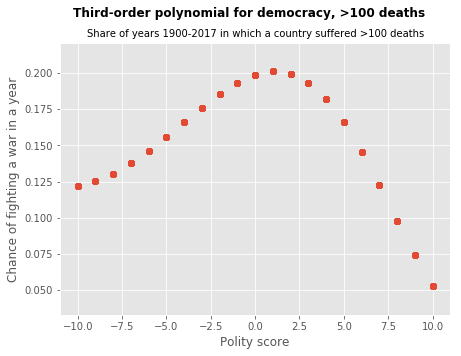

In [23]:
fig,ax = plt.subplots(figsize=(7,5))
plt.title("Share of years 1900-2017 in which a country suffered >100 deaths",size=10)
plt.suptitle("Third-order polynomial for democracy, >100 deaths",size=12,weight="bold")
ax.scatter(conflict_data_combined["country_democracy_scores"],conflict_data_combined["third_order_democracy_predicted_conflict_rate"])
ax.set_xlabel("Polity score")
ax.set_ylabel("Chance of fighting a war in a year")
plt.show()

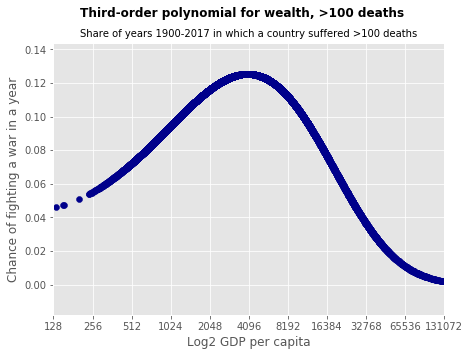

In [24]:
fig,ax = plt.subplots(figsize=(7,5))
plt.title("Share of years 1900-2017 in which a country suffered >100 deaths",size=10)
plt.suptitle("Third-order polynomial for wealth, >100 deaths",size=12,weight="bold")
ax.scatter(conflict_data_combined["log2_interpolated_gdp_per_capita"],conflict_data_combined["third_order_gdp_predicted_conflict_rate"],c="darkblue")
ax.set_xlim(7,17)
ax.set_xticks([i for i in range(7,18)])
ax.set_xticklabels([2**i for i in range(7,18)])
ax.set_xlabel("Log2 GDP per capita")
ax.set_ylabel("Chance of fighting a war in a year")
plt.show()